In [14]:
!pip install spotipy

Defaulting to user installation because normal site-packages is not writeable


## KONEKSI KE SPOTIFY

In [15]:
# menggunakan metode Http GET
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [16]:
# mencoba terhubung ke Spotify API
client_id ='701d61d4580a470f8f526befca8e5679'
client_secret = '10fc4e3e0a01488a93a332cb0761e91b'

In [18]:
# metode autentikasi
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

## MENGAMBIL DETAIL PLAYLIST 

In [150]:
# Playlist ID yg ingin diambil datanya
playlist_ids = ['spotify:playlist:3Ga9YWdERfmCpkoNlrE1tV']

# Function untuk mendefinisikan info playlist 
def get_playlist_info(playlist_ids, client_id, client_secret):
    
    playlist_info = []
    
    for playlist_id in playlist_ids:
        try:
            # Mengambil info detail playlist dari playlist ID
            playlist = sp.playlist(playlist_id)
            
            # Mengekstrak informasi playlist dgn dictionary
            playlist_name = playlist['name']
            owner = playlist['owner']['display_name']
            track_count = playlist['tracks']['total']
            description = playlist['description']
            
            # Menambahkan info playlist ke daftar/list
            playlist_info.append({
                'Playlist Name': playlist_name,
                'Owner': owner,
                'Track Count': track_count,
            })
        except:
            print(f"Error retrieving info for playlist ID: {playlist_id}")
    
    return playlist_info

# Function untuk memanggil info playlist
playlist_info = get_playlist_info(playlist_ids, client_id, client_secret)

In [151]:
# Cek apakah playlist yg diambil benar/tidak
for info in playlist_info:
    print(info)

{'Playlist Name': 'otw', 'Owner': 'psychobaby', 'Track Count': 216}


In [153]:
# Function untuk mendefinisikan popularitas lagu 
def get_track_popularity(track_id):
    # Mengambil/mendapatkan detail lagu dengan track ID
    track_details = sp.track(track_id)

    # Melakukan extract untuk popularitas lagu dari track_details
    popularity = track_details['popularity']
    return popularity

# Function untuk mendefinisikan fitur playlist
def get_playlist_features(playlist_id):
    
    playlist_features = []
    
    # Mengambil detail playlist dengan playlist ID
    playlist = sp.playlist(playlist_id)
    
    # Mengulang setiap lagu dari playlist menggunakan track ID
    for track in playlist['tracks']['items']:
        track_id = track['track']['id']
        
        # Memberikan info ttg fitur audio dr track ID
        features = sp.audio_features(track_id)

        # Mengambil detail lagu tertentu dengan track ID
        track_details = sp.track(track_id)
        
        # Memeriksa apakah list 'features' tidak kosong dan memiliki setidaknya 1 elemen
        if features and len(features) > 0:
            # Melakukan extract fitur audio dgn dictionary
            danceability = features[0]['danceability']
            acousticness = features[0]['acousticness']
            loudness = features[0]['loudness']
            energy = features[0]['energy']
            tempo = features[0]['tempo']

            # Mengambil detail lagu tertentu dari track_details
            album_name = track_details['album'] ['name']
            release_date = track_details['album']['release_date']
            # Function utk mendapatkan popularitas utk setiap lagu dipanggil terpisah
            popularity = get_track_popularity(track_id)
            
            # Menambahkan info fitur pada playlist ke daftar/list
            playlist_features.append({
                'Track Name': track['track']['name'],
                'Artists': ', '.join([artist['name'] for artist in track['track']['artists']]), 
                'Album': album_name,
                'Release Date': release_date,
                'Popularity': popularity,
                'Danceability': danceability,
                'Acousticness': acousticness,
                'Loudness': loudness,
                'Energy': energy,
                'Tempo': tempo
            })
    
    return playlist_features

# Memanggil function utk fitur playlist
playlist_features = get_playlist_features(playlist_id)

In [80]:
# Cek fitur-fitur playlist 
for features in playlist_features:
    print(features)

{'Track Name': 'Getaway Car', 'Artists': 'Taylor Swift', 'Album': 'reputation', 'Release Date': '2017-11-10', 'Popularity': 87, 'Danceability': 0.562, 'Acousticness': 0.00465, 'Loudness': -6.745, 'Energy': 0.689, 'Tempo': 172.054}
{'Track Name': 'Style', 'Artists': 'Taylor Swift', 'Album': '1989 (Deluxe)', 'Release Date': '2014-01-01', 'Popularity': 91, 'Danceability': 0.588, 'Acousticness': 0.00245, 'Loudness': -5.595, 'Energy': 0.791, 'Tempo': 94.933}
{'Track Name': 'With you', 'Artists': 'Jimin, HA SUNG WOON', 'Album': 'Our Blues, Pt. 4 (Original Television Soundtrack)', 'Release Date': '2022-04-24', 'Popularity': 75, 'Danceability': 0.532, 'Acousticness': 0.639, 'Loudness': -6.117, 'Energy': 0.426, 'Tempo': 149.898}
{'Track Name': 'Tek It', 'Artists': 'Cafuné', 'Album': 'Running', 'Release Date': '2021-07-20', 'Popularity': 0, 'Danceability': 0.419, 'Acousticness': 7.59e-05, 'Loudness': -5.604, 'Energy': 0.892, 'Tempo': 146.97}
{'Track Name': 'New Person, Same Old Mistakes', 'Artis

In [23]:
# Lopping untuk setiap playlist ID & mengambil playlist features utk setiap playlist
for playlist_id in playlist_ids:
    playlist_features = get_playlist_features(playlist_id)

In [24]:
# kita ingin membuat dataframe untuk menyimpan, visualisasi, dsb
import pandas as pd

In [154]:
# Buat container utk menyimpan semua fitur playlist, lalu buat dataframe
all_playlist_features = []

for playlist_id in playlist_ids:
    # Memanggil function get_playlist_features utk mengambil fitur pada playlist ID
    playlist_features = get_playlist_features(playlist_id)
    # Penambahan untuk playlist_features ke all_playlist_features
    all_playlist_features.extend(playlist_features)

# Buat dataframenya
df = pd.DataFrame(all_playlist_features)
df

,Track Name,Artists,Album,Release Date,Popularity,Danceability,Acousticness,Loudness,Energy,Tempo
0,Getaway Car,Taylor Swift,reputation,2017-11-10,88,0.562,0.004650,-6.745,0.689,172.054
1,Style,Taylor Swift,1989 (Deluxe),2014-01-01,91,0.588,0.002450,-5.595,0.791,94.933
2,With you,"Jimin, HA SUNG WOON","Our Blues, Pt. 4 (Original Television Soundtrack)",2022-04-24,75,0.532,0.639000,-6.117,0.426,149.898
3,Tek It,Cafuné,Running,2021-07-20,0,0.419,0.000076,-5.604,0.892,146.970
4,"New Person, Same Old Mistakes",Tame Impala,Currents,2015-07-17,82,0.470,0.272000,-6.740,0.809,151.836
...,...,...,...,...,...,...,...,...,...,...
95,drunk,keshi,always,2020-10-23,70,0.691,0.765000,-8.247,0.389,104.952
96,When You're Gone,Avril Lavigne,The Best Damn Thing,2007-04-13,0,0.458,0.189000,-3.921,0.719,142.032
97,Head Over Heels,Tears For Fears,Rule The World: The Greatest Hits,2017-11-10,73,0.602,0.502000,-4.251,0.839,95.159
98,505,Arctic Monkeys,Favourite Worst Nightmare,2007-04-22,87,0.526,0.002870,-5.822,0.866,140.266


In [26]:
# Menyimpan dataset ke format csv
csv_filename = 'spotify_playlist.csv'
df.to_csv(csv_filename, sep=',')

print(f"Dataset saved to {csv_filename}")

Dataset saved to spotify_playlist.csv


In [27]:
# Library yg diperlukan utk Excel di Pandas, seperti utk membaca atau menulis di file Excel.
!pip3 install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [28]:
# Menyimpan ke file Excel 
excel_filename = 'myplaylist_data.xlsx'
df.to_excel(excel_filename, index=False)

print(f"Dataset saved to {excel_filename}")

Dataset saved to myplaylist_data.xlsx


In [29]:
# Menampilkan 10 data teratas
playlist = pd.read_csv("spotify_playlist.csv")
playlist.head(10)

,Unnamed: 0,Track Name,Artists,Album,Release Date,Popularity,Danceability,Acousticness,Loudness,Energy,Tempo
0,0,Getaway Car,Taylor Swift,reputation,2017-11-10,87,0.562,0.004650,-6.745,0.689,172.054
1,1,Style,Taylor Swift,1989 (Deluxe),2014-01-01,91,0.588,0.002450,-5.595,0.791,94.933
2,2,With you,"Jimin, HA SUNG WOON","Our Blues, Pt. 4 (Original Television Soundtrack)",2022-04-24,75,0.532,0.639000,-6.117,0.426,149.898
3,3,Tek It,Cafuné,Running,2021-07-20,0,0.419,0.000076,-5.604,0.892,146.970
4,4,"New Person, Same Old Mistakes",Tame Impala,Currents,2015-07-17,82,0.470,0.272000,-6.740,0.809,151.836
5,5,Beg For Me,Red Velvet,‘The ReVe Festival 2022 - Feel My Rhythm’,2022-03-21,54,0.713,0.171000,-3.074,0.796,146.986
6,6,BAMBOLEO,Red Velvet,‘The ReVe Festival 2022 - Feel My Rhythm’,2022-03-21,59,0.652,0.029600,-3.322,0.880,107.950
7,7,See You Again (feat. Kali Uchis),"Tyler, The Creator, Kali Uchis",Flower Boy,2017-07-21,93,0.558,0.371000,-9.222,0.559,78.558
8,8,Disenchanted,My Chemical Romance,The Black Parade,2006-10-23,78,0.343,0.002180,-3.926,0.692,174.070
9,9,Baby Came Home 2 / Valentines,The Neighbourhood,Wiped Out!,2015-10-30,70,0.210,0.068700,-9.754,0.499,74.094


In [30]:
# Menampilkan nama penyanyi dan lagu di urutan pertama pada playlist 
df [['Artists', 'Track Name']].iloc[0]

Artists       Taylor Swift
Track Name     Getaway Car
Name: 0, dtype: object

## MENGAMBIL INFO GENRE PADA LAGU

In [140]:
# Nama lagu dan penyanyi yang ingin kita cari tahu genrenya (menggunakan Spotify API)
track_name = 'Psycho'
artist_name = 'Red Velvet'

In [142]:
# Track ID yang ingin diambil
track_id = 'spotify:track:3CYH422oy1cZNoo0GTG1TK'

# Mengambil detail lagu
track = sp.track(track_id)
# dictionary track utk daftar penyanyi
artists = track['artists']

# Mengambil detail penyanyi dgn list comprehension & extract genre 
artist_ids = [artist['id'] for artist in artists]
artist_details = sp.artists(artist_ids)

# menggunakan set (iterable) 
genres = set()

for artist_detail in artist_details['artists']:
    genres.update(artist_detail['genres'])


In [143]:
print("Genres for the track:")
for genre in genres:
    print(genre)

Genres for the track:
k-pop
k-pop girl group


## VISUALISASI DATA

In [32]:
# Library utk Correlation Matrix
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [33]:
# Library utk visualisasi
import seaborn as sns

In [34]:
# 1 = korelasi positif sempurna, -1 = korelasi negatif sempurna, 0 = tidak ada korelasi
corr_matrix = df.corr()
corr_matrix

,Popularity,Danceability,Acousticness,Loudness,Energy,Tempo
Popularity,1.000000,-0.037395,-0.033723,0.097232,0.059532,-0.059524
Danceability,-0.037395,1.000000,-0.134250,0.185835,0.115542,-0.203076
Acousticness,-0.033723,-0.134250,1.000000,-0.407500,-0.616457,-0.168047
Loudness,0.097232,0.185835,-0.407500,1.000000,0.710974,0.127797
Energy,0.059532,0.115542,-0.616457,0.710974,1.000000,0.223367
Tempo,-0.059524,-0.203076,-0.168047,0.127797,0.223367,1.000000


In [35]:
# Library utk visualisasi
import matplotlib.pyplot as plt

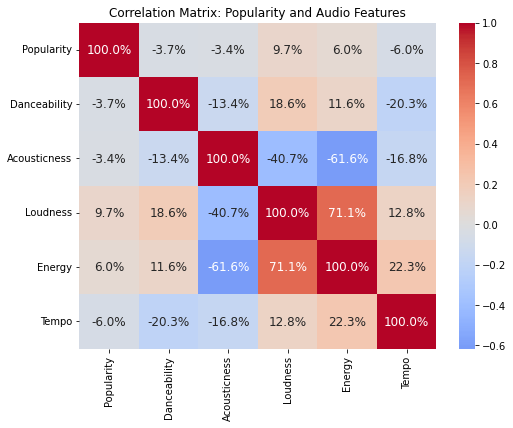

In [36]:
# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".1%", annot_kws={"size": 12})
plt.title('Correlation Matrix: Popularity and Audio Features')
plt.show()

## Visualisasi bagaimana jumlah lagu bervariasi dari waktu ke waktu

In [169]:
# Extract tahun(year) dari 'Release Date'
df['Release Year'] = df['Release Date'].dt.year
df['Release Year']

# Menggunakan group by utk menggabungkan lagu dari tahun rilis
track_count_by_year = df.groupby('Release Year').size()


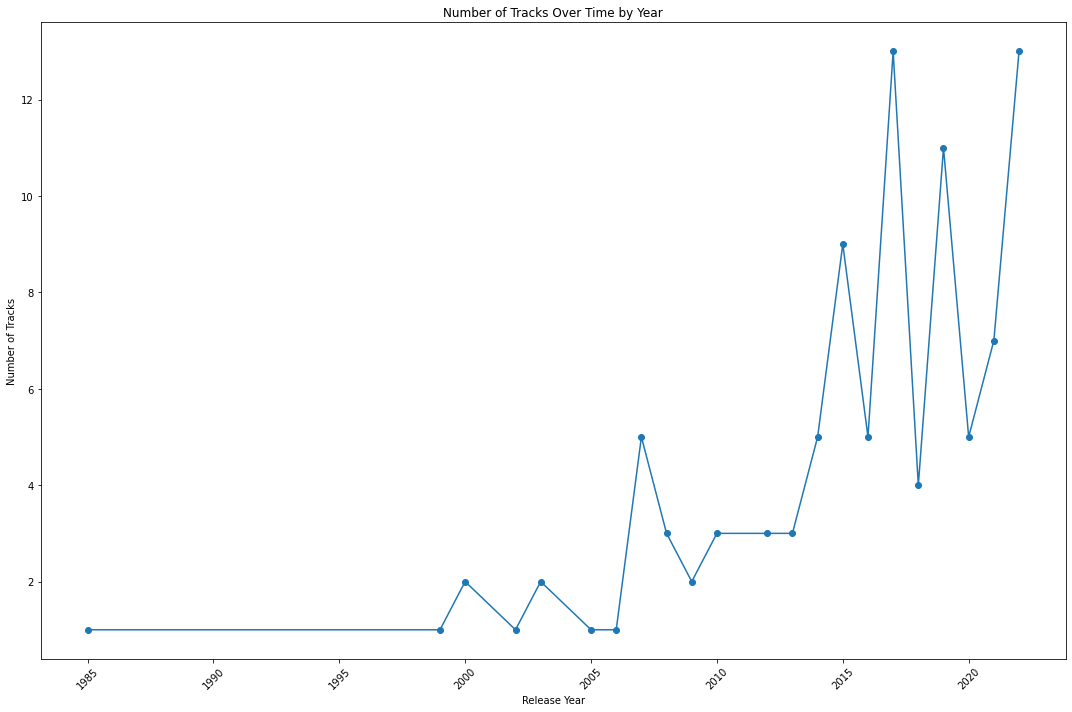

In [170]:
# Plotting [Line Plot]
plt.figure(figsize=(15, 10))
plt.plot(track_count_by_year.index, track_count_by_year.values, marker='o')
plt.xlabel('Release Year')
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks Over Time by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Visualisasi Top Artist dari Jumlah Kemunculan setiap Penyanyi pada Playlist

In [37]:
# Menghitung jumlah kemunculan setiap artis/penyanyi
top_artists = df['Artists'].str.split(', ').explode().value_counts()
top_artists

Red Velvet           8
Lana Del Rey         8
Taylor Swift         7
The Weeknd           4
Sheila On 7          4
                    ..
Natalie Imbruglia    1
Jonas Brothers       1
GOON DES GARCONS*    1
IV Of Spades         1
Jimin                1
Name: Artists, Length: 74, dtype: int64

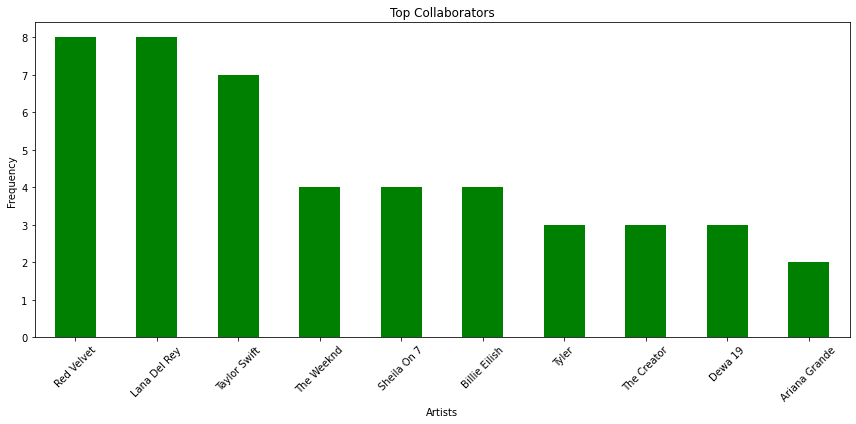

In [38]:
# Plotting [Bar Chart]
plt.figure(figsize=(12, 6))
top_artists[:10].plot(kind='bar', color='green')
plt.xlabel('Artists')
plt.ylabel('Frequency')
plt.title('Top Collaborators')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Visualisasi 10 Most Popular Songs & Artist pada Playlist

In [173]:
# Mengurutkan DataFrame 'df' berdasarkan kolom popularity (urutan menurun)
df_sorted = df.sort_values(by='Popularity', ascending=False)
top_10_popular = df_sorted.head(10)
top_10_popular

,Track Name,Artists,Album,Release Date,Popularity,Danceability,Acousticness,Loudness,Energy,Tempo,Release Year
61,Cruel Summer,Taylor Swift,Lover,2019-08-23,99,0.552,0.11700,-5.707,0.702,169.994,2019
7,See You Again (feat. Kali Uchis),"Tyler, The Creator, Kali Uchis",Flower Boy,2017-07-21,93,0.558,0.37100,-9.222,0.559,78.558,2017
1,Style,Taylor Swift,1989 (Deluxe),2014-01-01,91,0.588,0.00245,-5.595,0.791,94.933,2014
0,Getaway Car,Taylor Swift,reputation,2017-11-10,88,0.562,0.00465,-6.745,0.689,172.054,2017
64,Call Out My Name,The Weeknd,"My Dear Melancholy,",2018-03-30,88,0.461,0.17000,-4.954,0.593,134.170,2018
98,505,Arctic Monkeys,Favourite Worst Nightmare,2007-04-22,87,0.526,0.00287,-5.822,0.866,140.266,2007
27,Summertime Sadness,Lana Del Rey,Born To Die - The Paradise Edition,2012-01-01,87,0.565,0.05420,-6.826,0.654,111.968,2012
99,Young And Beautiful,Lana Del Rey,Young And Beautiful,2013-01-01,87,0.324,0.26200,-8.920,0.416,113.986,2013
59,Is There Someone Else?,The Weeknd,Dawn FM,2022-01-06,86,0.702,0.03880,-7.830,0.586,134.951,2022
71,West Coast,Lana Del Rey,Ultraviolence (Deluxe),2014-01-01,86,0.527,0.19400,-7.664,0.591,123.167,2014


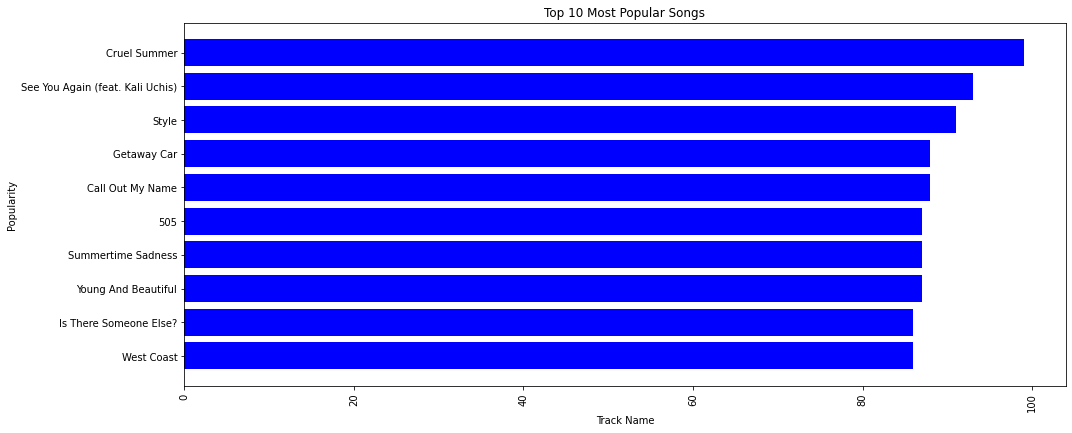

In [175]:
# Plotting
plt.figure(figsize=(15, 6))
plt.barh(top_10_popular['Track Name'], top_10_popular['Popularity'], color='blue')
plt.xlabel('Track Name')
plt.ylabel('Popularity')
plt.title('Top 10 Most Popular Songs')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest popularity at the top
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

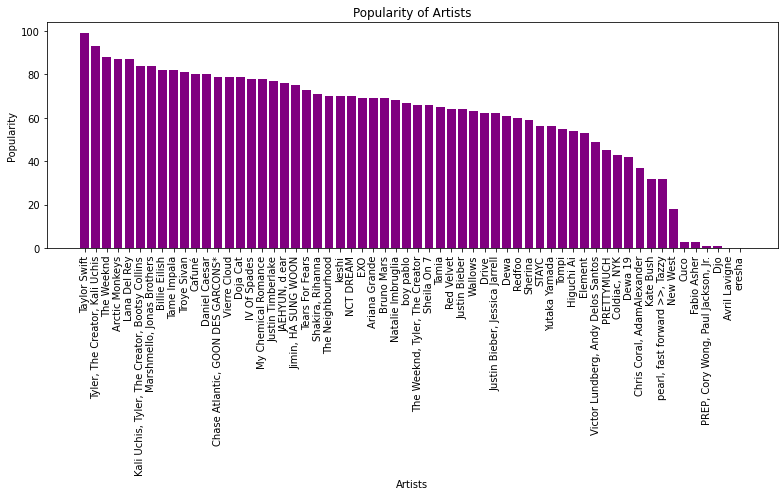

In [176]:
plt.figure(figsize=(11, 7))
plt.bar(df_sorted['Artists'], df_sorted['Popularity'], color='purple')
plt.xlabel('Artists')
plt.ylabel('Popularity')
plt.title('Popularity of Artists')
plt.xticks(rotation=90)
plt.tight_layout()

## 

In [145]:
# utk mengakses personal listening history & mengambil info tentang lagu yang sudah dimainkan
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from collections import Counter

In [155]:
# membuka halaman utk izin akses
redirect_uri = 'http://localhost:80/callback'

## MENAMPILKAN LAGU TERAKHIR DIPUTAR DI SPOTIFY

In [44]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri, scope="user-library-read user-read-playback-state user-read-recently-played"))

In [133]:
# Membuat variable recently_played utk mengambil 10 lagu yg terakhir diputar
recently_played = sp.current_user_recently_played(limit=10)  

In [134]:
# Buat list utk menyimpan detail lagu seperti nama lagu & penyanyi
track_names = []
artist_names = []

# Melakukan extract 
for item in recently_played['items']:
    track = item['track']
    # Menambahkan nama lagu & penyanyi pertama & menyimpannya secara terpisah
    track_names.append(track['name'])
    artist_names.append(track['artists'][0]['name'])

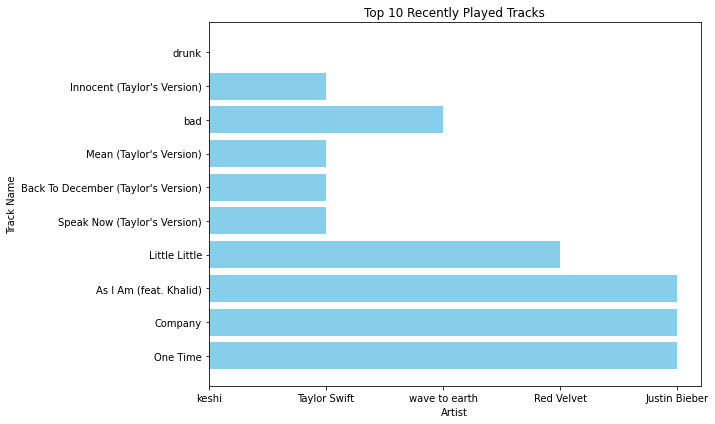

In [139]:
# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.barh(track_names, artist_names, color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Track Name')
plt.title('Top 10 Recently Played Tracks')
plt.gca().invert_yaxis()  # untuk menampilkan top track di paling atas
plt.tight_layout()
plt.show()

## Genre paling umum pada Playlist

In [146]:
playlist_id = 'spotify:playlist:3Ga9YWdERfmCpkoNlrE1tV'

# Meminta track ID dalam setiap item
playlist_tracks = sp.playlist_tracks(playlist_id, fields ='items(track(id))')

In [147]:
# Melacak jumlah genre
genre_counter = Counter()

# Looping 
for item in playlist_tracks['items']:
    track = item['track']
    track_id = track['id']
    track_info = sp.track(track_id)
    for artist in track_info['artists']:
        artist_info = sp.artist(artist['id'])
        # Mengambil genre yg terkait dgn artist
        genres = artist_info['genres']
        # Memperbarui jumlah genre dalam genre_counter
        genre_counter.update(genres)

In [149]:
# Menggunakan object most_common dr Counter utk mengambil genre paling umum
most_common_genre = genre_counter.most_common(1)[0]
# Extract nama genre dr tuple & extract jumlah kejadian dr tuple
print(f"The most common genre in the playlist is '{most_common_genre[0]}' with {most_common_genre[1]} occurrences.")

The most common genre in the playlist is 'pop' with 39 occurrences.
